In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Work Flow:


1.   Preprocess -> EDA -> Feature selection
2.   extract input and output cols
3.   Scale the values
4.   Train test split
5.   Train the model
6.   Evaluate the Model/Model selection
7.   Deploy the model


In [ ]:
df = pd.read_csv("/content/placement.csv")

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


### removing first columns as preprocessing

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


#### EDA

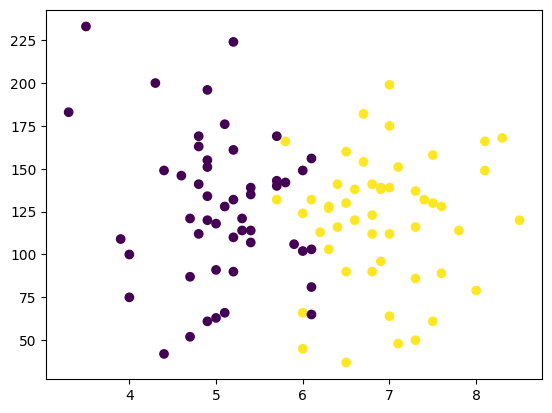

In [ ]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])

#### Extracting input and output variables


In [ ]:
x = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [ ]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


#### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.1)

In [ ]:
X_train


,cgpa,iq
21,7.1,151.0
9,5.1,66.0
40,4.9,134.0
84,5.7,169.0
69,8.5,120.0
...,...,...
78,6.1,81.0
52,7.0,175.0
57,6.5,130.0
50,3.5,233.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[ 1.02611516,  0.64668036],
       [-0.74474513, -1.5657994 ],
       [-0.92183116,  0.20418441],
       [-0.21348705,  1.11520549],
       [ 2.26571736, -0.16022402],
       [-1.18746021,  0.51653449],
       [-1.45308925,  1.92210987],
       [ 0.31777104,  0.04800936],
       [-0.83328815, -0.91507006],
       [-1.71871829, -0.6808075 ],
       [-0.65620212,  0.15212606],
       [-1.80726131, -0.44654494],
       [-1.01037418,  0.38638862],
       [ 0.14068501, -1.59182858],
       [ 1.20320119, -0.26434072],
       [-0.74474513,  0.04800936],
       [-0.74474513,  1.2974097 ],
       [-1.09891719, -1.93020783],
       [-0.21348705,  0.43844697],
       [-0.21348705,  0.36035945],
       [ 0.14068501,  0.77682623],
       [-0.5676591 , -0.31639907],
       [-0.65620212,  2.54681004],
       [-0.92183116,  0.75079705],
       [ 0.84902913,  0.33433028],
       [ 1.46883023, -0.96712841],
       [ 1.38028722, -1.69594527],
       [-0.03640102, -0.52463246],
       [ 0.93757214,

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 1.64591626, -0.31639907],
       [ 0.31777104,  0.02198019],
       [-0.92183116,  1.81799317],
       [ 0.31777104, -0.60271998],
       [ 0.93757214, -1.61785775],
       [ 1.02611516, -2.03432453],
       [ 1.20320119, -1.04521593],
       [ 1.20320119, -1.98226618],
       [-1.71871829, -1.33153684],
       [ 0.40631406,  0.38638862]])

#### Training Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
# model training
clf.fit(X_train, Y_train)

LogisticRegression()

#### Evaluating the model

In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test, Y_pred)

1.0

#### Plotting the classification boundaries


<Axes: >

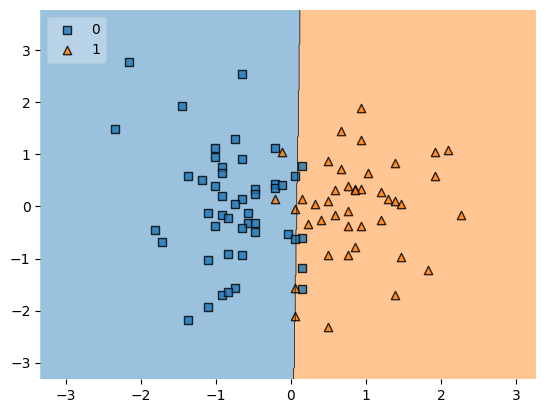

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

#### **Deploying**

In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open('model.pkl', 'wb'))